|-------------------------------|-------------------------------|-----------------------------|
|:--                            |              :----:           |                        :---:|
|**Machine Learning**           |Dr. Hector Ceballos            |Dr. Neil Hernández           |
|**Final Project**              |Adrián García López            |Sharif Nasser Kadamani       |
|27 / 11 / 2020                 |A01351166                      |A00820367                    |
|-------------------------------|-------------------------------|-----------------------------|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score, davies_bouldin_score
%matplotlib inline

In [2]:
df = pd.read_csv("ECOAS_MachineLearning_202013_puntajes.csv", encoding="latin-1")

# Descriptive Analysis

In [3]:
df.head()

,ID,Rectoría,Campus,Tamaño,Latitud,Longitud,División,Departamento,AnonMateria,crn,...,ProfesorTitular,Comentarios,DocumentSentiment,sentimiento,Categoria,Subcategoria,EntitiesList,APR,RET,REC
0,1,Región Norte,Monterrey,Grande,25.652217,-100.289794,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,...,SI,hace ejercicios con aplicaciones en la vida real,0.10,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,NaN,9.59,9.67,9.41
1,2,Región Norte,Monterrey,Grande,25.652217,-100.289794,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,...,SI,le importa y se preocupa por sus alumnos siemp...,0.30,Positivo,Competencia General,Promueve las prácticas éticas y cívicas,NaN,9.59,9.67,9.41
2,3,Región Norte,Monterrey,Grande,25.652217,-100.289794,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,...,SI,muy bu,0.00,Neutral,Sin Clasificar,Sin clasificar,NaN,9.59,9.67,9.41
3,4,Región Norte,Monterrey,Grande,25.652217,-100.289794,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,...,SI,"muy buena maestra. explica muy bien, y buena a...",0.48,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,buena actitud,9.59,9.67,9.41
4,5,Región Norte,Monterrey,Grande,25.652217,-100.289794,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,...,SI,"posee amplios conocimientos, por lo que siempr...",0.09,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,NaN,9.59,9.67,9.41


In [4]:
df.describe()

,ID,Latitud,Longitud,AnonMateria,crn,DocumentSentiment,APR,RET,REC
count,69983.000000,67708.000000,67708.000000,69983.000000,69983.000000,69983.000000,69983.000000,69983.000000,69983.000000
mean,34992.000000,22.219090,-100.622532,142.114299,12015.598703,0.194510,8.936814,9.074867,8.622936
std,20202.496281,3.047445,2.202331,140.009280,8339.078756,0.293191,0.842533,0.682638,1.161023
min,1.000000,16.765328,-110.911320,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,17496.500000,19.359603,-100.403904,52.000000,4806.000000,0.000000,8.600000,8.800000,8.095000
50%,34992.000000,20.736384,-100.289794,88.000000,9483.000000,0.240000,9.150000,9.230000,8.930000
75%,52487.500000,25.652217,-99.227543,198.000000,18328.000000,0.400000,9.500000,9.530000,9.450000
max,69983.000000,31.717777,-93.200868,706.000000,31484.000000,1.000000,10.000000,10.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69983 entries, 0 to 69982
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 69983 non-null  int64  
 1   Rectoría           69983 non-null  object 
 2   Campus             69983 non-null  object 
 3   Tamaño             67708 non-null  object 
 4   Latitud            67708 non-null  float64
 5   Longitud           67708 non-null  float64
 6   División           69983 non-null  object 
 7   Departamento       69983 non-null  object 
 8   AnonMateria        69983 non-null  int64  
 9   crn                69983 non-null  int64  
 10  Pregunta           69983 non-null  object 
 11  NominaFict         69983 non-null  object 
 12  TipoProfesor       69983 non-null  object 
 13  ProfesorTitular    69983 non-null  object 
 14  Comentarios        68318 non-null  object 
 15  DocumentSentiment  69983 non-null  float64
 16  sentimiento        687

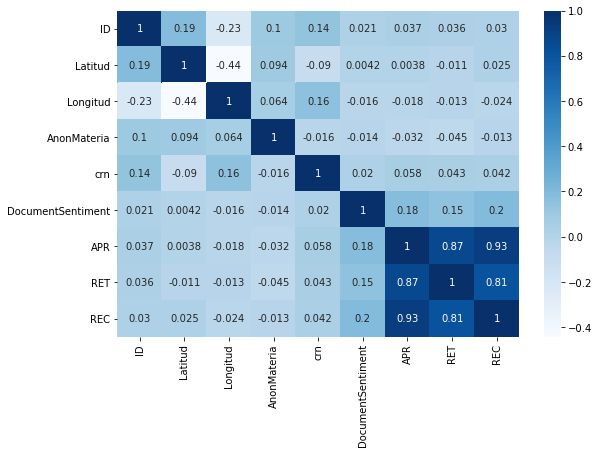

In [6]:
f, ax = plt.subplots(figsize=(9, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap=plt.cm.Blues)
plt.show()

In [7]:
df.columns

Index(['ID', 'Rectoría', 'Campus', 'Tamaño', 'Latitud', 'Longitud', 'División',
       'Departamento', 'AnonMateria', 'crn', 'Pregunta', 'NominaFict',
       'TipoProfesor', 'ProfesorTitular', 'Comentarios', 'DocumentSentiment',
       'sentimiento', 'Categoria', 'Subcategoria', 'EntitiesList', 'APR',
       'RET', 'REC'],
      dtype='object')

In [8]:
columns = ['TipoProfesor', 'ProfesorTitular', 'Subcategoria', 'APR', 'DocumentSentiment']
df_columns = df[columns]
df_columns.head(5)

,TipoProfesor,ProfesorTitular,Subcategoria,APR,DocumentSentiment
0,Cátedra,SI,Habilidades de Enseñanza,9.59,0.10
1,Cátedra,SI,Promueve las prácticas éticas y cívicas,9.59,0.30
2,Cátedra,SI,Sin clasificar,9.59,0.00
3,Cátedra,SI,Habilidades de Enseñanza,9.59,0.48
4,Cátedra,SI,Habilidades de Enseñanza,9.59,0.09


In [9]:
df_dummies = pd.get_dummies(df_columns, columns=['TipoProfesor', 'ProfesorTitular', 'Subcategoria'])
print(df_dummies.columns)
df_dummies = df_dummies.drop(columns=['ProfesorTitular_NO', 'TipoProfesor_Cátedra', 'Subcategoria_Sin clasificar'])

Index(['APR', 'DocumentSentiment', 'TipoProfesor_Cátedra',
       'TipoProfesor_Planta', 'ProfesorTitular_NO', 'ProfesorTitular_SI',
       'Subcategoria_Comunicativas', 'Subcategoria_Conocimiento del tema',
       'Subcategoria_Diseño y Estructura',
       'Subcategoria_Habilidades de Enseñanza',
       'Subcategoria_Habilidades de Evaluación',
       'Subcategoria_Manejo del ambiente en la clase',
       'Subcategoria_Promueve las prácticas éticas y cívicas',
       'Subcategoria_Puntualidad y Asistencia',
       'Subcategoria_Relación intergeneracional',
       'Subcategoria_Sin clasificar', 'Subcategoria_Tecnológicas'],
      dtype='object')


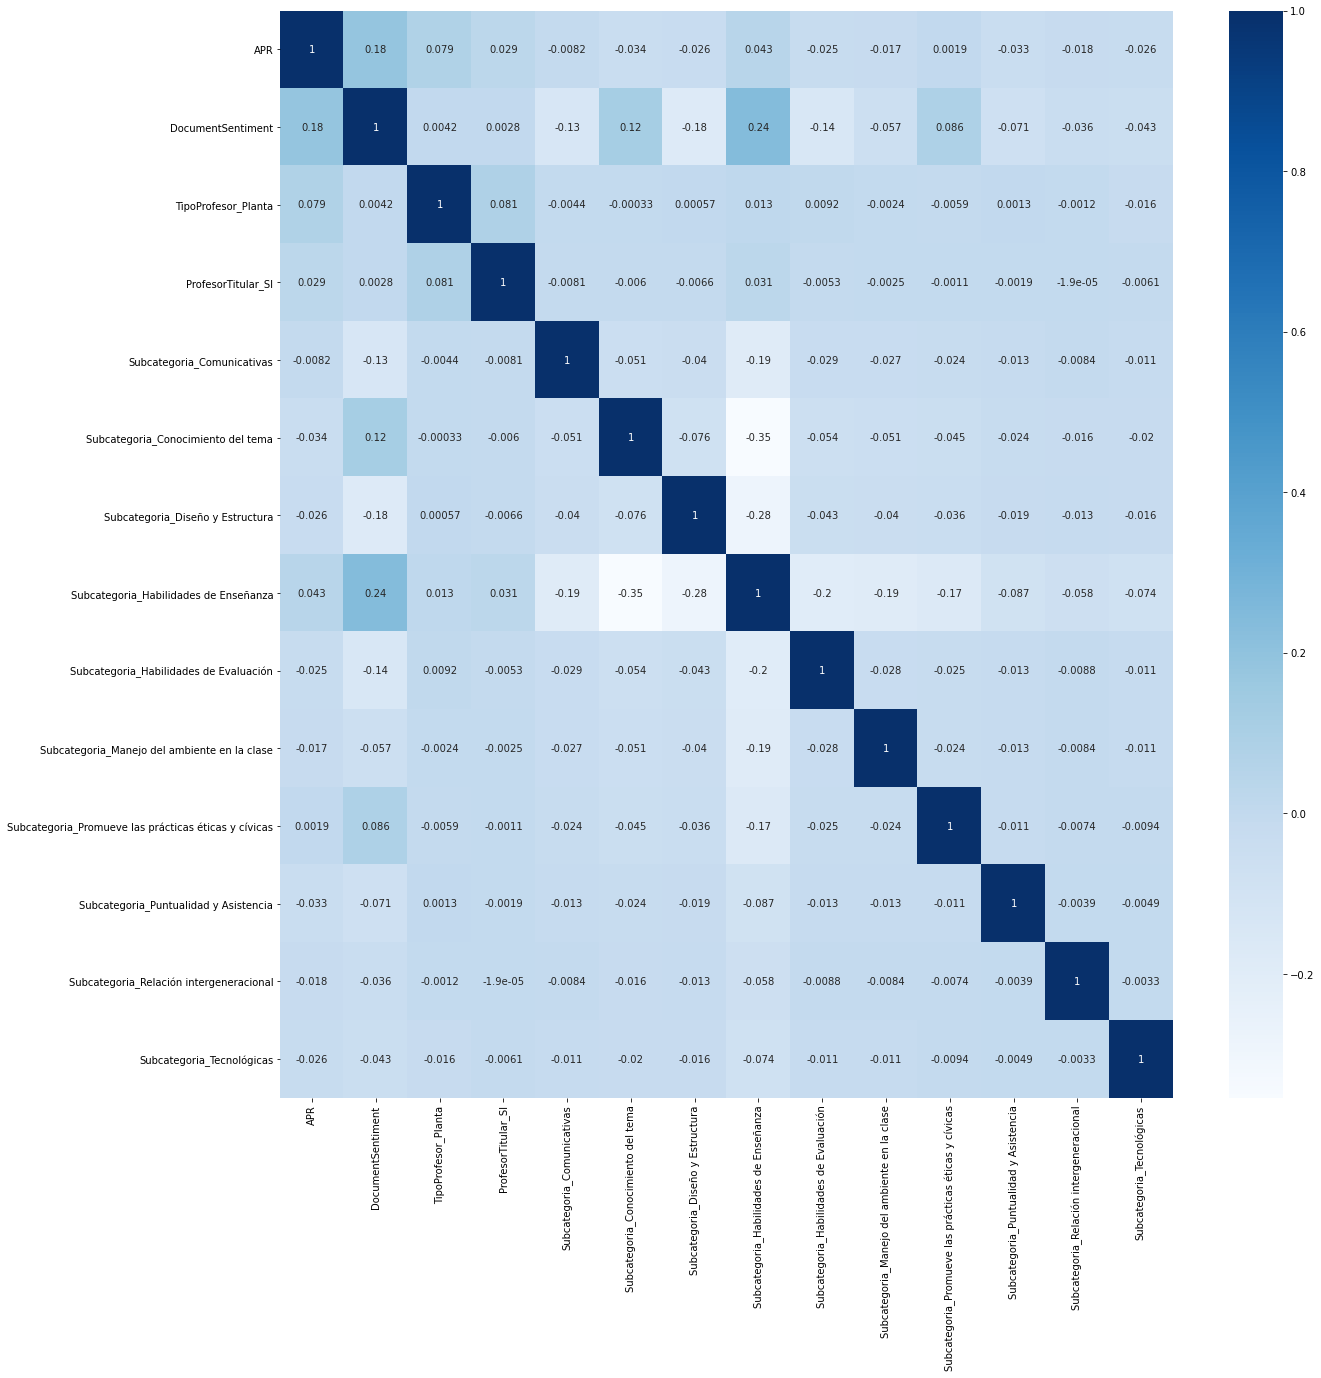

In [10]:
f, ax = plt.subplots(figsize=(20, 20))
corr_matrix = df_dummies.corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap=plt.cm.Blues)
plt.show()

In [11]:
#sns.pairplot(df_dummies)
#plt.show()

In [11]:
X = df_dummies.values

# Principal Component Analysis (PCA)

## Standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Select number of components for PCA

### Short way

In [13]:
from sklearn.decomposition import PCA
variance_needed = 0.95
pca = PCA(n_components = variance_needed) # we indicate that we want to keep at leat 95% of variance explained
X_pca = pca.fit_transform(X_std)
print(f"Number of components needed to have at least {95}% of explained variance = {pca.n_components_}")

Number of components needed to have at least 95% of explained variance = 13


### Long way

In [14]:
pca = PCA()
X_pca = pca.fit(X_std)

In [15]:
eigen_vectors= pca.components_
eigen_values = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
numbers_of_components = range(1, len(explained_variance_ratio) + 1)
print(pd.DataFrame( {'cumulativa explained variance': np.cumsum(explained_variance_ratio)}, index=numbers_of_components))

    cumulativa explained variance
1                        0.119422
2                        0.209654
3                        0.289736
4                        0.364654
5                        0.439224
6                        0.512793
7                        0.586168
8                        0.658616
9                        0.730301
10                       0.801890
11                       0.870463
12                       0.934454
13                       0.980489
14                       1.000000


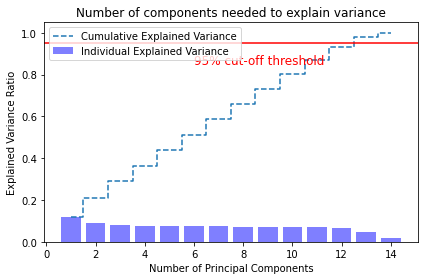

In [16]:
plt.figure(figsize=(6, 4))
plt.bar(numbers_of_components, explained_variance_ratio, alpha=0.5, align='center',
        label='Individual Explained Variance', color='blue')
plt.step(numbers_of_components, np.cumsum(explained_variance_ratio), where='mid', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(6, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.title("Number of components needed to explain variance")
plt.legend(loc='best')
plt.tight_layout()

### Results
We decided to use the first 13 Principal Components since they are able to explain almost 95% of the variance.

## Dimensionality reduction

In [18]:
num_components = 13
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std)

### Optional: Check which features are contributing most to the components

In [19]:
pd.DataFrame(pca.components_, columns = df_dummies.columns)

,APR,DocumentSentiment,TipoProfesor_Planta,ProfesorTitular_SI,Subcategoria_Comunicativas,Subcategoria_Conocimiento del tema,Subcategoria_Diseño y Estructura,Subcategoria_Habilidades de Enseñanza,Subcategoria_Habilidades de Evaluación,Subcategoria_Manejo del ambiente en la clase,Subcategoria_Promueve las prácticas éticas y cívicas,Subcategoria_Puntualidad y Asistencia,Subcategoria_Relación intergeneracional,Subcategoria_Tecnológicas
0,-0.226841,-0.477347,-0.050097,-0.058406,0.222595,0.168281,0.336684,-0.640844,0.239575,0.167840,0.041401,0.115967,0.067425,0.087078
1,0.209108,0.443067,0.041178,-0.009591,-0.098145,0.697115,-0.133180,-0.364734,-0.115203,0.037402,0.296808,-0.080732,-0.030614,-0.039837
2,-0.444419,0.053319,-0.649220,-0.509226,-0.083558,0.135019,-0.193766,0.092210,-0.130480,-0.040784,-0.019124,0.048837,0.029133,0.159072
3,0.126455,0.062186,-0.136606,-0.149441,-0.183423,-0.224754,0.696715,-0.030875,-0.458140,-0.069671,0.350333,-0.158422,-0.070675,-0.032444
4,0.159172,0.041327,-0.100653,-0.134002,0.334125,-0.400479,-0.344574,-0.069279,0.116883,0.371205,0.625285,-0.077459,-0.021108,0.020814
5,0.116024,-0.022195,-0.022541,-0.060494,0.812439,0.102518,-0.027482,0.003516,-0.427143,-0.273547,-0.197066,-0.093508,-0.050387,-0.056086
6,-0.041155,-0.010176,0.032672,0.105554,-0.045436,0.025362,-0.034744,0.004254,-0.493660,0.797264,-0.309880,0.074093,0.034763,0.002612
7,-0.175444,-0.010167,0.104610,0.270501,-0.002803,-0.036909,-0.098386,0.000772,-0.325421,-0.208698,0.321546,0.714282,0.291383,0.161256
8,-0.022614,-0.003853,0.029064,0.134790,-0.007266,-0.008909,-0.025373,-0.005725,-0.052110,-0.038986,0.004646,-0.499286,0.735175,0.430845
9,0.013104,-0.004905,0.057731,0.152189,-0.003956,-0.000129,-0.019080,-0.009250,-0.042793,-0.023602,-0.000758,-0.052108,-0.548737,0.816473


# K-means Clustering

## Find optimal number of clusters

In [20]:
sse = []
silhouette_coeff = []
davies_bouldin_index = []

K = range(7, 15) 

for k in K:  
    print(k)
    k_means = KMeans(n_clusters=k)
    cluster_labels = k_means.fit_predict(X_pca)     
    
    sse.append(k_means.inertia_)
    if k > 1:
        #silhouette_coeff.append(silhouette_score(X_pca, cluster_labels))
        davies_bouldin_index.append(davies_bouldin_score(X_pca, cluster_labels))

7
8
9
10
11
12
13
14


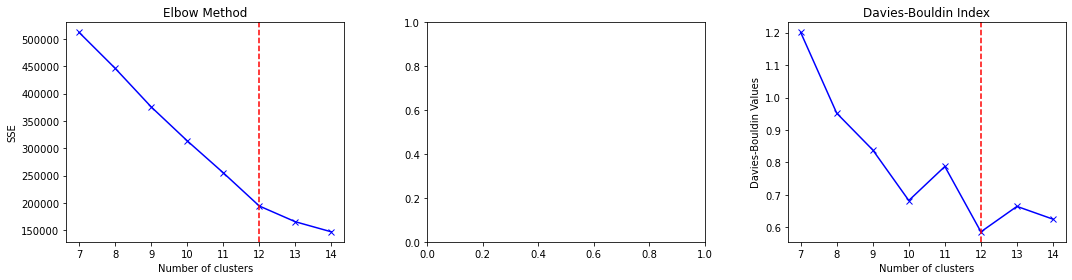

In [22]:
number_clusters = 12

fig, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].plot(K, sse, 'bx-') 
ax[0].axvline(x=number_clusters, color='r', linestyle='--')
ax[0].set_xlabel('Number of clusters') 
ax[0].set_ylabel('SSE') 
ax[0].set_title('Elbow Method')

# ax[1].plot(K[1:], silhouette_coeff, 'bx-')
# ax[1].axvline(x=number_clusters, color='r', linestyle='--')
# ax[1].set_xlabel('Number of clusters')
# ax[1].set_ylabel('Silhouette Coefficient') 
# ax[1].set_title('Silhouette Analysis')

ax[2].plot(K[:], davies_bouldin_index, 'bx-')
ax[2].axvline(x=number_clusters, color='r', linestyle='--')
ax[2].set_xlabel('Number of clusters')
ax[2].set_ylabel('Davies-Bouldin Values') 
ax[2].set_title('Davies-Bouldin Index')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

### Results
Using these three methods together, we found that 12 was the best number of clusters to find in the dataset.

## Generate clusters

In [23]:
k_means = KMeans(n_clusters=number_clusters)
kmeans_clusters = k_means.fit_predict(X_pca) 

## Describe clusters

In [24]:
df = df_dummies
cluster = {}
table_kmeans = pd.DataFrame(index=range(number_clusters), columns=["size"] + df.columns.tolist())

for i in range(number_clusters):
    cluster[str(i)] = df[kmeans_clusters == i]
    cluster[str(i) + "_avg"] = cluster[str(i)].mean()
    table_kmeans.loc[i, "size"] = len(cluster[str(i)])

    for column in df.columns:
        table_kmeans.loc[i, column] = cluster[str(i) + "_avg"][column]   

In [26]:
new_columns = table_kmeans.columns.tolist()
new_columns.remove("DocumentSentiment")
new_columns += ["DocumentSentiment"]
table_kmeans = table_kmeans[new_columns]
print("-------- Table with clusters size, original features average and DocumentSentiment mean for K-Mean clusters --------")
table_kmeans

-------- Table with clusters size, original features average and DocumentSentiment mean for K-Mean clusters --------


,size,APR,TipoProfesor_Planta,ProfesorTitular_SI,Subcategoria_Comunicativas,Subcategoria_Conocimiento del tema,Subcategoria_Diseño y Estructura,Subcategoria_Habilidades de Enseñanza,Subcategoria_Habilidades de Evaluación,Subcategoria_Manejo del ambiente en la clase,Subcategoria_Promueve las prácticas éticas y cívicas,Subcategoria_Puntualidad y Asistencia,Subcategoria_Relación intergeneracional,Subcategoria_Tecnológicas,DocumentSentiment
0,36647,8.93908,0,1,0,0,0,0.766311,0,0,0,0,0,0,0.216796
1,2049,8.8175,0.247438,0.914592,0,0,0,0,1,0,0,0,0,0,-0.0426306
2,1834,8.84705,0.219193,0.918757,0,0,0,0,0,1,0,0,0,0,0.0924264
3,5625,8.85296,0.235733,1,0,1,0,0,0,0,0,0,0,0,0.307621
4,1846,8.89479,0.213976,0.909534,1,0,0,0,0,0,0,0,0,0,-0.0441278
5,181,8.63503,0.21547,0.922652,0,0,0,0,0,0,0,0,1,0,-0.011768
6,3992,8.84655,0.226202,0.915581,0,0,1,0,0,0,0,0,0,0,-0.0163302
7,1450,8.9477,0.208276,0.92069,0,0,0,0,0,0,1,0,0,0,0.367883
8,405,8.57511,0.232099,0.916049,0,0,0,0,0,0,0,1,0,0,-0.0797284
9,11276,9.08941,1,1,0,0,0,0.779266,0,0,0,0,0,0,0.224517


# DBSCAN Model

## Generate clusters

In [30]:
dbscan = DBSCAN(eps=1, min_samples=300)
dbscan_clusters = dbscan.fit_predict(X_pca)
n_clusters = np.sum(np.unique(dbscan_clusters)>-1)
print("Estimated number of clusters: ", n_clusters)
n_noise = np.sum(dbscan_clusters==-1)
print("Estimated number of noise points: ", n_noise)
print(f"Estimated percentage of outliers: {n_noise/len(dbscan_clusters)*100}%")

Estimated number of clusters:  14
Estimated number of noise points:  6349
Estimated percentage of outliers: 9.072203249360559%


## Describe clusters

In [31]:
dbscan_cluster = {}
table_dbscan = pd.DataFrame(index=range(n_clusters), columns=["size"] + df.columns.tolist())

for i in range(n_clusters):
    dbscan_cluster[str(i)] = df[dbscan_clusters == i]
    dbscan_cluster[str(i) + "_avg"] = dbscan_cluster[str(i)].mean()
    table_dbscan.loc[i, "size"] = len(dbscan_cluster[str(i)])

    for column in df.columns:
        table_dbscan.loc[i, column] = dbscan_cluster[str(i) + "_avg"][column]   

In [32]:
table_dbscan = table_dbscan[new_columns]
print("------ Table with clusters size, original features average and DocumentSentiment mean for DBSCAN clusters ------")
table_dbscan

------ Table with clusters size, original features average and DocumentSentiment mean for DBSCAN clusters ------


,size,APR,TipoProfesor_Planta,ProfesorTitular_SI,Subcategoria_Comunicativas,Subcategoria_Conocimiento del tema,Subcategoria_Diseño y Estructura,Subcategoria_Habilidades de Enseñanza,Subcategoria_Habilidades de Evaluación,Subcategoria_Manejo del ambiente en la clase,Subcategoria_Promueve las prácticas éticas y cívicas,Subcategoria_Puntualidad y Asistencia,Subcategoria_Relación intergeneracional,Subcategoria_Tecnológicas,DocumentSentiment
0,27958,8.95769,0,1,0,0,0,1,0,0,0,0,0,0,0.255941
1,911,9.11434,0,1,0,0,0,0,0,0,1,0,0,0,0.405565
2,8361,9.0111,0,1,0,0,0,0,0,0,0,0,0,0,0.102028
3,1174,8.97151,0,1,0,0,0,0,1,0,0,0,0,0,0.00530664
4,2652,8.93185,0,1,0,0,1,0,0,0,0,0,0,0,-0.0185709
5,1049,9.06355,0,1,0,0,0,0,0,1,0,0,0,0,0.169266
6,1114,9.00979,0,1,1,0,0,0,0,0,0,0,0,0,-0.0318582
7,4199,8.88479,0,1,0,1,0,0,0,0,0,0,0,0,0.312201
8,2274,9.06775,0,0,0,0,0,1,0,0,0,0,0,0,0.29223
9,805,9.12234,0,0,0,0,0,0,0,0,0,0,0,0,0.0362609


# Extra points


In [35]:
graph = pd.DataFrame(X_pca)
graph["kmeans_clusters"] = kmeans_clusters
graph["dbscan_clusters"] = dbscan_clusters

## Visualize clusters distribution with Principal Components 

### Visualize K-Means Clusters distribution with Principal Components 

In [30]:
sns.pairplot(graph, hue="kmeans_clusters")

NameError: name 'graph' is not defined

### Visualize DBSCAN Clusters distribution with Principal Components 

In [ ]:
sns.pairplot(graph, hue="dbscan_clusters")

# Linear Regression - OLS

In [34]:
import statsmodels.api as sm

# Model with all variables
exog_vars = df_dummies.drop(columns=['DocumentSentiment', 'Subcategoria_Manejo del ambiente en la clase', 'TipoProfesor_Planta']).columns
X = df_dummies[exog_vars]
#X = sm.add_constant(X)
y = df['DocumentSentiment']

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      DocumentSentiment   R-squared (uncentered):                   0.414
Model:                            OLS   Adj. R-squared (uncentered):              0.414
Method:                 Least Squares   F-statistic:                              4497.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                        0.00
Time:                        06:42:11   Log-Likelihood:                         -7488.2
No. Observations:               69983   AIC:                                  1.500e+04
Df Residuals:                   69972   BIC:                                  1.510e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
APR                                                      0.0174      0.000     39.785      0.000       0.017       0.018
ProfesorTitular_SI                                      -0.0510      0.004    -13.894      0.000      -0.058      -0.044
Subcategoria_Comunicativas                              -0.1522      0.007    -22.893      0.000      -0.165      -0.139
Subcategoria_Conocimiento del tema                       0.1992      0.004     48.739      0.000       0.191       0.207
Subcategoria_Diseño y Estructura                        -0.1233      0.005    -25.677      0.000      -0.133      -0.114
Subcategoria_Habilidades de Enseñanza                    0.1484      0.003     56.719      0.000       0.143       0.154
Subcategoria_Habilidades de Evaluación                  -0.1491      0.006    -23.505      0.000      -0.162      -0.137
Subcategoria_Promueve las prácticas éticas y cívicas     0.2594      0.007     34.981      0.000       0.245       0.274
Subcategoria_Puntualidad y Asistencia                   -0.1819      0.014    -13.422      0.000      -0.209      -0.155
Subcategoria_Relación intergeneracional                 -0.1147      0.020     -5.695      0.000      -0.154      -0.075
Subcategoria_Tecnológicas                               -0.1050      0.016     -6.609      0.000      -0.136      -0.074
==============================================================================
Omnibus:                     2557.439   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3531.874
Skew:                          -0.382   Prob(JB):                         0.00
Kurtosis:                       3.793   Cond. No.                         179.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""